In [1]:
import spikeinterface.full as si
from probeinterface.plotting import plot_probe, plot_probegroup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from scipy import stats
import os
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Your code goes here




In [6]:

def remove_all_from_ax(ax):
    for spine in ax.spines.values():
        spine.set_visible(False) 
    ax.tick_params(left=False, bottom=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    return ax

In [ ]:
def plot_grid_cells_on_probe(project_path, mouse, grid_threshold):
    # get sorting analyzer and unit locations
    day_paths = [f.path for f in os.scandir(f"{project_path}{mouse}/") if f.is_dir()]

    all_spike_data = pd.DataFrame()
    for day_path in day_paths:
        sorting_analyzer_path = f"{day_path}/full/kilosort4/kilosort4_sa"
        of_spikes_path = f"{day_path}/of1/kilosort4/spikes.pkl"

        if os.path.isdir(sorting_analyzer_path) and os.path.exists(of_spikes_path):
            sorting_analyzer = si.load_sorting_analyzer(sorting_analyzer_path)
            ulc = sorting_analyzer.get_extension("unit_locations")
            qms = sorting_analyzer.get_extension("quality_metrics")
            unit_locations = ulc.get_data(outputs="by_unit")
            quality_metrics = qms.get_data()
            quality_metrics["cluster_id"] = quality_metrics.index
            spike_data = pd.read_pickle(of_spikes_path)
            spike_data = pd.merge(spike_data, quality_metrics, on="cluster_id")

            spike_data['unit_location_x'] = spike_data.index.map(lambda unit: unit_locations[unit][0])
            spike_data['unit_location_y'] = spike_data.index.map(lambda unit: unit_locations[unit][1])
            spike_data['unit_location_z'] = spike_data.index.map(lambda unit: unit_locations[unit][2])

            spike_data = spike_data[(spike_data["snr"] > 1) & 
                                    (spike_data["mean_firing_rate"] > 0.5) & 
                                    (spike_data["rp_contamination"] < 0.9)]

            all_spike_data = pd.concat([all_spike_data, spike_data], ignore_index=True)

    n_grid_cells =len(all_spike_data[all_spike_data["grid_score"]> grid_threshold])
    percentage_grid_cells = 100*n_grid_cells/len(all_spike_data)
    print(f"For mouse {mouse}: n grid cells: {n_grid_cells}, %: {percentage_grid_cells}")
        
    fig, ax = plt.subplots(figsize=(10, 6))
    probe_group = sorting_analyzer.get_probegroup()
    plot_probegroup(probe_group, ax=ax, probe_shape_kwargs={"alpha":0.5,"color":"lightgrey"}, contacts_kargs={"alpha":0.0})
    grid_cells = all_spike_data[all_spike_data["grid_score"] > grid_threshold]
    non_grid_cells = all_spike_data[all_spike_data["grid_score"] < grid_threshold]
    ax.scatter(non_grid_cells['unit_location_x'], 
                non_grid_cells['unit_location_y'], zorder=2, alpha=0.5, label="NG", marker="x", color="grey")
    ax.scatter(grid_cells['unit_location_x'], 
                grid_cells['unit_location_y'], zorder=2, alpha=1, label="G", marker="x", color="red")

    ax.set_xlim(-200, 1700)
    ax.set_ylim(-200, 3000)
    #ax.set_title("all cells")
    ax = remove_all_from_ax(ax)
    plt.legend()
    plt.show()

For mouse M22: n grid cells: 23, %: 1.075268817204301


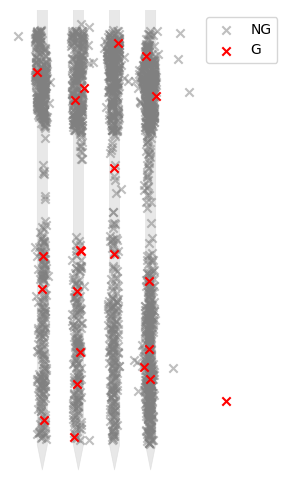

In [ ]:
plot_grid_cells_on_probe(project_path= "/mnt/datastore/Chris/Cohort12/derivatives/", mouse= "M22", grid_threshold=0.3)
plot_grid_cells_on_probe(project_path= "/mnt/datastore/Chris/Cohort12/derivatives/", mouse= "M22", grid_threshold=0.5)

For mouse M25: n grid cells: 60, %: 4.854368932038835


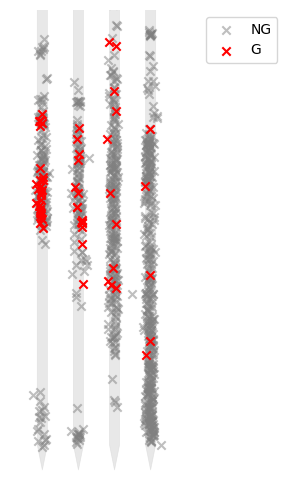

In [ ]:
plot_grid_cells_on_probe(project_path= "/mnt/datastore/Chris/Cohort12/derivatives/", mouse="M25", grid_threshold=0.3)
plot_grid_cells_on_probe(project_path= "/mnt/datastore/Chris/Cohort12/derivatives/", mouse="M25", grid_threshold=0.5)

For mouse M26: n grid cells: 34, %: 2.5185185185185186


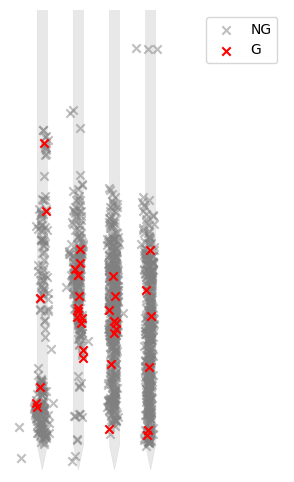

In [ ]:
plot_grid_cells_on_probe(project_path= "/mnt/datastore/Chris/Cohort12/derivatives/", mouse= "M26", grid_threshold=0.3)
plot_grid_cells_on_probe(project_path= "/mnt/datastore/Chris/Cohort12/derivatives/", mouse= "M26", grid_threshold=0.5)

For mouse M27: n grid cells: 27, %: 2.1343873517786562


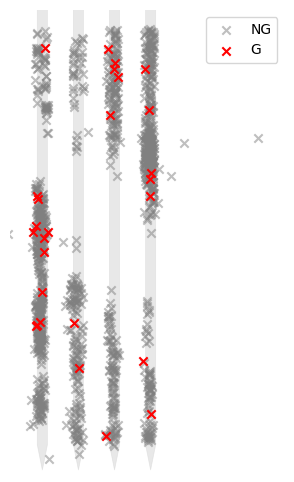

In [ ]:
plot_grid_cells_on_probe(project_path= "/mnt/datastore/Chris/Cohort12/derivatives/", mouse= "M27", grid_threshold=0.3)
plot_grid_cells_on_probe(project_path= "/mnt/datastore/Chris/Cohort12/derivatives/", mouse= "M27", grid_threshold=0.5)